# <u> Task-02 :</u>
 CIN: PIT/JUN24/17544

### Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

### Dataset:  https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# Let's import necessary libraries
import pandas as pd
import os
# os.environ["MKL_NUM_THREADS"] = "1" # To clear a warning
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"Mall_Customers.csv")

In [4]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Look for missing values in the dataframe
print(f"\nNull count :-\n{df.isna().sum()}")


Null count :-
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Now, let's scale the values in the dataframe
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Spending Score (1-100)']])
df[['Age', 'Spending Score (1-100)']] = scaler.transform(df[['Age', 'Spending Score (1-100)']])
df

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,15,0.387755
1,2,Male,0.057692,15,0.816327
2,3,Female,0.038462,16,0.051020
3,4,Female,0.096154,16,0.775510
4,5,Female,0.250000,17,0.397959
...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918
196,197,Female,0.519231,126,0.275510
197,198,Male,0.269231,126,0.744898
198,199,Male,0.269231,137,0.173469


In [8]:
# Let's check SSE(Sum of Square Errors) for each value of K
sse = []
for k in range(1, 11):
    check_k = KMeans(n_clusters=k, n_init='auto')
    check_k.fit(df[['Age', 'Spending Score (1-100)']])
    # inertia_ is a parameter that gives the value of SSE calculated
    sse.append(check_k.inertia_)

# SSE values calculated the range of K
# sse

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

In [9]:
sse

[28.178337844315365,
 13.337690580804235,
 8.743281510740557,
 6.369358666824115,
 5.040311808653135,
 3.757518908301825,
 3.9462522656842163,
 2.7858097994624975,
 2.436780768268374,
 2.221734169416491]

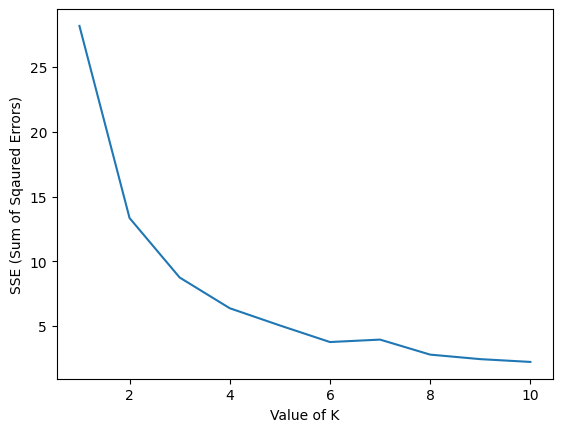

In [10]:
# Now, let's plot SSE values in a chart
plt.xlabel('Value of K')
plt.ylabel('SSE (Sum of Sqaured Errors)')
plt.plot(range(1, 11), sse)

In [11]:
# Now let's apply the KMeans algorithm
km = KMeans(n_clusters=4, n_init='auto')
y_pred = km.fit_predict(df[['Age', 'Spending Score (1-100)']])
y_pred

C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sanke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

array([3, 1, 2, 1, 3, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 2, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 2, 3, 3, 3, 0, 0, 0, 0, 3, 2, 3, 1, 3, 1, 2, 1, 0, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [12]:
# The centroids of the 4 clusters
print(f"\nCentroids : {km.cluster_centers_}")
df['cluster'] = y_pred
df


Centroids : [[0.73461538 0.41190476]
 [0.23414305 0.83011099]
 [0.38965201 0.18051506]
 [0.15619137 0.50721752]]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,15,0.387755,3
1,2,Male,0.057692,15,0.816327,1
2,3,Female,0.038462,16,0.051020,2
3,4,Female,0.096154,16,0.775510,1
4,5,Female,0.250000,17,0.397959,3
...,...,...,...,...,...,...
195,196,Female,0.326923,120,0.795918,1
196,197,Female,0.519231,126,0.275510,2
197,198,Male,0.269231,126,0.744898,1
198,199,Male,0.269231,137,0.173469,2


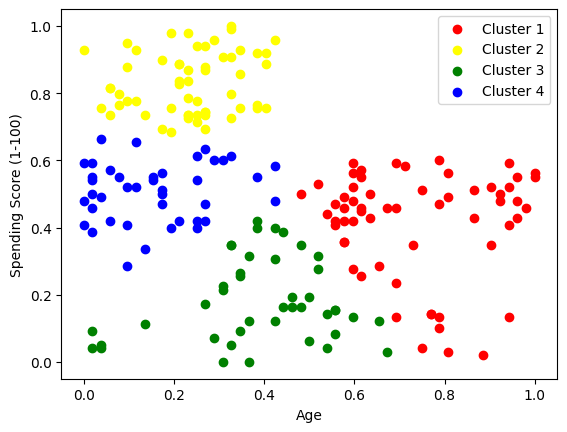

In [13]:
# Grouping clusters based on their centroids and predictions
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]
df4 = df[df['cluster'] == 3]

# Apply different colors to groups to differentiate each group
plt.scatter(df1['Age'], df1['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(df2['Age'], df2['Spending Score (1-100)'], color='yellow', label='Cluster 2')
plt.scatter(df3['Age'], df3['Spending Score (1-100)'], color='green', label='Cluster 3')
plt.scatter(df4['Age'], df4['Spending Score (1-100)'], color='blue', label='Cluster 4')

# Plot the values
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()